In [1]:
import networkx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import os
import matplotlib.colors as colors
import matplotlib.cm as cmx
import json
import cylouvain
%matplotlib inline

In [5]:
data = None
with open('tgexport_chats.json') as f:
    data = json.loads(f.read())

In [6]:
chats = data['chats']['list']
i=0
for c in chats:
    if 'FR' in c['name'].upper():
        print i,c['name']
    i+=1

0 FR_Помощничество
2 FR_🏴‍☠️FR🏴‍☠️
3 FR_FLOOD_SPB
6 FR_Уженещеглятник
7 FR_Наставники и наставничата
9 Fraternitas Ruthenica_MSK
13 FR_ИнфоЯсли
18 FR_Наставничество
19 FR_SPb
20 FR_InfoSex
21 FR_ООО "Аудиторская компания "РегионАудит"
22 FR_МАТЮРI
23 FR_ECON
30 FR_Сайт+Бот
31 FR_Арбитраж: разработка
38 FR_Бамонка
40 FR_Тайный Санта
43 FR_РЕФОРМЫ
44 FR_Набор ((18+))
45 FR_Выезд в Питер 3.0
48 FR_разбуди меня
50 FR_HSE
51 FR_Teen
52 FR_Казанелёт
53 FR_ITs
56 FR_ДНД
57 FR_наказание&поощрение
62 FR_Арбитраж: разработка
63 FR_Кнопки
64 FR_bottorture
72 FR_БОТ
75 FR_mailtest
76 FR_Тайный Санта
77 FR_Du Hast
78 FR_Влюблённые
85 FR_NPC
90 FR_УЛЬТИМАТИВНЫЙ ХОТСИТ
94 FR_Театр
103 FR_киноклуб
105 FR _ Minsk 2018
108 FR _ Minsk 2018
109 FR_КРИПТОКОЛОНИЯ
113 FR_Флуд
117 FR_Подмосковная ойкумена
119 FR_ДНД


In [7]:
target_chats = [c for c in chats if 'FR' in c['name'].upper()]

In [11]:
chat_name = chats[2]['name']#'FR_🏴‍☠️FR🏴‍☠️'
print(chat_name)
chat = filter(lambda x: x['name'] == chat_name, chats)[0]
chat['id']

FR_🏴‍☠️FR🏴‍☠️


9978478271

In [12]:
messages = chat['messages']

In [13]:
def get_events_from_messages_json(messages):
    rows = []
    for msg in messages:
        if msg['type'] != 'message':
            continue
        
        if 'service' in msg['type']:
            continue            
        row = {
            'id': msg['id'],
            'from': msg['from'],
            'from_id': msg['from_id'],
            'date': msg['date'],
            'type': 'message',
            'reply_to_message_id': None
        }
        if msg.get('reply_to_message_id'):
            row['type'] = 'reply'
            row['reply_to_message_id'] = msg['reply_to_message_id']
        rows.append(row)
        if isinstance(msg['text'], list):
            for i in msg['text']:
                if isinstance(i, dict):
                    if i.get('type') and i.get('type') == 'mention':
                        new_row = dict(row)
                        new_row['type'] = 'mention'
                        new_row['mention_username'] = i['text']
                        rows.append(new_row)
    events = pd.DataFrame(rows)
    return events
df = get_events_from_messages_json(messages)
df.head(30)

date                           from    from_id      id  \
0   2018-12-21T00:07:53                        Борис Ц  389451119  308082   
1   2018-12-21T00:08:33                  raspberry lsd  315366369  308083   
2   2018-12-21T00:09:07                        Борис Ц  389451119  308084   
3   2018-12-21T00:09:20                      настенька  345079141  308085   
4   2018-12-21T00:09:34                      настенька  345079141  308086   
5   2018-12-21T00:11:17                        Борис Ц  389451119  308087   
6   2018-12-21T00:29:20                      настенька  345079141  308089   
7   2018-12-21T00:29:20                           Юлка  169187336  308090   
8   2018-12-21T00:29:21                  Фан Слкдствие  338011120  308091   
9   2018-12-21T00:29:32                           Юлка  169187336  308092   
10  2018-12-21T00:29:47                           Юлка  169187336  308093   
11  2018-12-21T00:29:47                           Юлка  169187336  308093   
12  2018-12-21T00:29:52                           Юлка  169187336  308094   
13  2018-12-21T00:30:04                           Юлка  169187336  308095   
14  2018-12-21T00:30:06                        Борис Ц  389451119  308096   
15  2018-12-21T00:30:08                           Юлка  169187336  308097   
16  2018-12-21T00:30:15                      настенька  345079141  308098   
17  2018-12-21T00:30:21                    Глеб Шезерр   23028404  308099   
18  2018-12-21T00:30:27                      настенька  345079141  308100   
19  2018-12-21T00:31:06                  Фан Слкдствие  338011120  308101   
20  2018-12-21T00:31:26                      настенька  345079141  308102   
21  2018-12-21T00:32:06                           Юлка  169187336  308103   
22  2018-12-21T00:34:20                      настенька  345079141  308104   
23  2018-12-21T00:41:51  P. E. T. R. O. W. I. T. C. H.  344777686  308105   
24  2018-12-21T00:41:51                       Julia L.   10912455  308106   
25  2018-12-21T00:41:51                       Julia L.   10912455  308106   
26  2018-12-21T00:41:57  P. E. T. R. O. W. I. T. C. H.  344777686  308107   
27  2018-12-21T00:42:19                        Борис Ц  389451119  308108   
28  2018-12-21T00:43:10                      настенька  345079141  308109   
29  2018-12-21T00:43:22  P. E. T. R. O. W. I. T. C. H.  344777686  308110   

   mention_username  reply_to_message_id     type  
0               NaN                  NaN  message  
1               NaN             308082.0    reply  
2               NaN             308083.0    reply  
3               NaN             308082.0    reply  
4               NaN                  NaN  message  
5               NaN                  NaN  message  
6               NaN                  NaN  message  
7               NaN                  NaN  message  
8               NaN                  NaN  message  
9               NaN                  NaN  message  
10              NaN                  NaN  message  
11       @btseytlin                  NaN  mention  
12              NaN                  NaN  message  
13              NaN                  NaN  message  
14              NaN             308093.0    reply  
15              NaN                  NaN  message  
16              NaN             308095.0    reply  
17              NaN             308095.0    reply  
18              NaN                  NaN  message  
19              NaN                  NaN  message  
20              NaN                  NaN  message  
21              NaN             308098.0    reply  
22              NaN             308103.0    reply  
23              NaN                  NaN  message  
24              NaN                  NaN  message  
25       @btseytlin                  NaN  mention  
26              NaN                  NaN  message  
27              NaN             308106.0    reply  
28              NaN             308108.0    reply  
29              NaN                  NaN  message

In [7]:
print(df.shape)

(110801, 7)


In [15]:
list(df.columns)

['date',
 'from',
 'from_id',
 'id',
 'mention_username',
 'reply_to_message_id',
 'type']

In [22]:
events = pd.DataFrame(columns=['chat_id',
                               'chat_name',
                               'date',
                             'from',
                             'from_id',
                             'id',
                             'mention_username',
                             'reply_to_message_id',
                             'type'])

for chat in target_chats:
    messages = chat['messages']
    df = get_events_from_messages_json(messages)
    df['chat_id'] = chat['id']
    df['chat_name'] = chat['name']
    events = pd.concat([events, df], ignore_index=True)
events.head()

/home/boris/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


chat_id         chat_name                 date            from  \
0  8827804907  FR_Помощничество  2019-03-25T16:57:25         Борис Ц   
1  8827804907  FR_Помощничество  2019-03-25T16:58:04         Борис Ц   
2  8827804907  FR_Помощничество  2019-03-25T16:58:04         Борис Ц   
3  8827804907  FR_Помощничество  2019-03-25T16:58:36         Борис Ц   
4  8827804907  FR_Помощничество  2019-03-25T16:59:08  Федор Панфикон   

     from_id      id mention_username reply_to_message_id     type  
0  389451119  364033              NaN                 NaN  message  
1  389451119  364034              NaN                 NaN  message  
2  389451119  364035              NaN                 NaN  message  
3  389451119  364036              NaN                 NaN  message  
4  114379293  364043              NaN                 NaN  message

In [27]:
events.to_csv('fr_messages.csv', encoding='utf-8')

In [28]:
df = events

In [29]:
merged = pd.merge(df, df, left_on='reply_to_message_id', right_on='id')

to_rename = {
    'id_x': 'id',
    'from_x': 'from',
    'from_id_x': 'from_id',
    'type_x': 'type',
    'date_x': 'date',
    'reply_to_message_id_x': 'reply_to_message_id',
    'from_y': 'to_name',
    'from_id_y': 'to_id',
}

cols = ['type', 'date', 'id', 'from', 'from_id', 'reply_to_message_id', 'to_id', 'to_name']

merged = merged.rename(to_rename, axis=1)[cols]
print merged.shape
merged.head()

(392732, 8)


type                 date      id            from    from_id  \
0  reply  2019-03-25T17:00:12  364047         Борис Ц  389451119   
1  reply  2019-03-25T17:00:12  364047         Борис Ц  389451119   
2  reply  2019-02-09T10:44:43  364059              W.     454074   
3  reply  2019-02-09T10:44:43  364059              W.     454074   
4  reply  2019-03-26T21:25:12  365034  Федор Панфикон  114379293   

  reply_to_message_id      to_id         to_name  
0              364043  114379293  Федор Панфикон  
1              364043   74194522  Dmitry Abramov  
2              364043  114379293  Федор Панфикон  
3              364043   74194522  Dmitry Abramov  
4              364052  389451119         Борис Ц

In [30]:
username_to_id_table = {'Ilshatey': 261054454, 'vilified': 235124428, 'FuneralClown': 233647730, 'airshipkirov': 315085916, 'simonpopov': 107649094, 'shmelium': 32280739, 'rhoddyown': 1293538, 'Crypto_mate': 509112, 'HeraclitusOfEphesus': 324840931, 'i_dunno_lolz': 307413057, 'mzjhn': 3554141, 'vashe_blag0rodie': 472506237, 'Powerdoge': 232242583, 'narost': 78862035, 'akarigale': 233230567, 'Estarosaa': 190918998, 'noxotb': 121656528, 'aristophanes': 446747504, 'Leifr_Ingvarrsson': 161424463, 'Roman_Kuznetzov': 373953157, 'golosowanie': 23028404, 'herrschindler': 93052382}
username_to_id_table

{'Crypto_mate': 509112,
 'Estarosaa': 190918998,
 'FuneralClown': 233647730,
 'HeraclitusOfEphesus': 324840931,
 'Ilshatey': 261054454,
 'Leifr_Ingvarrsson': 161424463,
 'Powerdoge': 232242583,
 'Roman_Kuznetzov': 373953157,
 'airshipkirov': 315085916,
 'akarigale': 233230567,
 'aristophanes': 446747504,
 'golosowanie': 23028404,
 'herrschindler': 93052382,
 'i_dunno_lolz': 307413057,
 'mzjhn': 3554141,
 'narost': 78862035,
 'noxotb': 121656528,
 'rhoddyown': 1293538,
 'shmelium': 32280739,
 'simonpopov': 107649094,
 'vashe_blag0rodie': 472506237,
 'vilified': 235124428}

In [33]:
nodes_ids = merged['from_id'].values
node_attrs = merged[['from', 'from_id']].to_dict(orient='records')
nodes = zip(nodes_ids, node_attrs)

edge_attrs = merged[['date', 'type', 'id']].to_dict(orient='records')
edges = [tuple(x for x in arr) for arr in merged[['from_id', 'to_id']].values]
graph = nx.DiGraph()
graph.add_nodes_from(nodes)

graph.add_edges_from(edges)

attrs = ['date', 'type', 'id']
for attr in attrs:
    attr_dict = dict(zip(edges, merged[attr].values))
    nx.set_edge_attributes(graph, attr, attr_dict)

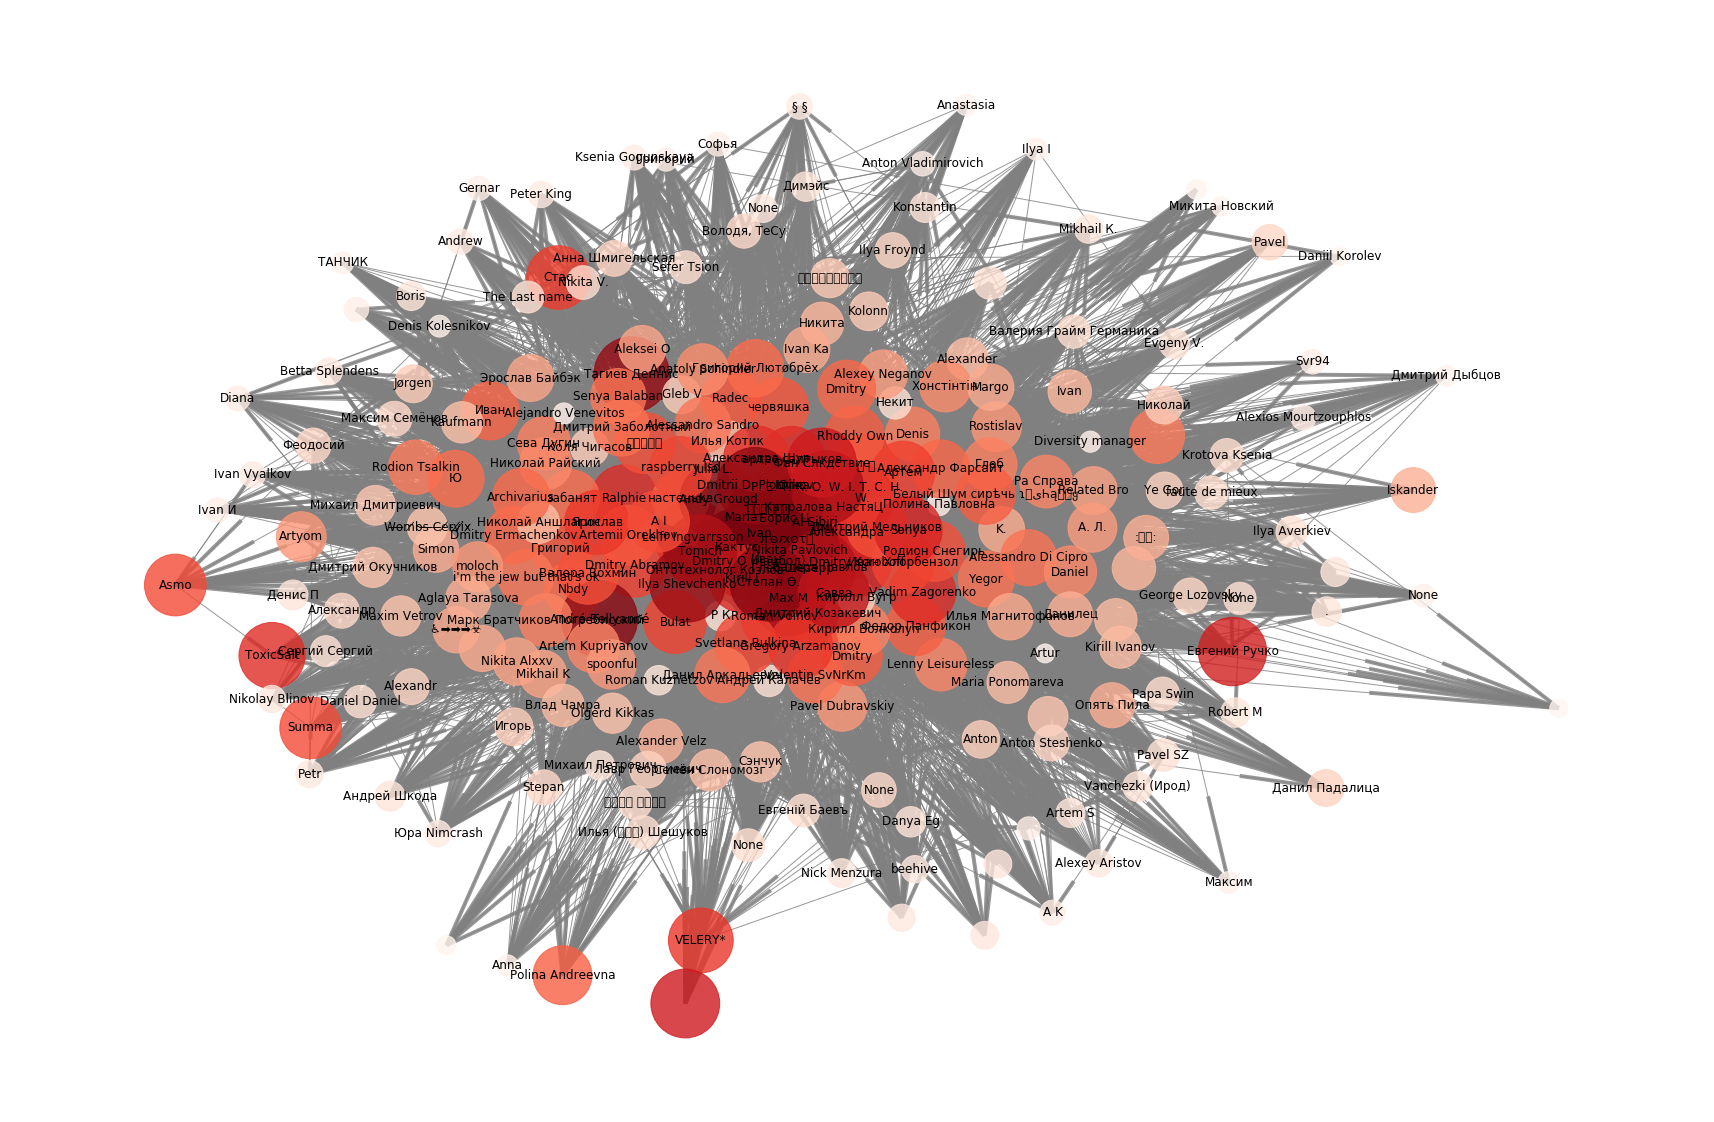

In [35]:
degree = graph.in_degree()# nx.degree(graph)


filtered_nodes = [k for k, v in degree.items() if v > 10]
subgraph = nx.subgraph(graph, filtered_nodes)

degree = subgraph.in_degree()#nx.degree(subgraph)
labels = nx.get_node_attributes(subgraph, 'from')

plt.figure(1, figsize=(30,20))
plt.axis('off')
pos = nx.spring_layout(subgraph, k=3/np.sqrt(subgraph.order()))
nx.draw_networkx(subgraph,
                 pos=pos,
                 node_size = [d*30 for k, d in degree.items()],
                 node_color=degree.values(),
                 font_size=12,
                 cmap=plt.cm.Reds,
                 with_labels=True,
                 labels=labels,
                 edge_color='grey',
                 alpha=0.8)
plt.savefig(chat_name+'_graph.png')
plt.show()


In [19]:
from collections import Counter
weighted_graph = nx.DiGraph()
weighted_graph.add_nodes_from(nodes)
weighted_edges = [(x, y, {'weight': v}) for (x, y), v in Counter(edges).items()]


weighted_graph.add_edges_from(weighted_edges)

/home/boris/anaconda3/envs/py2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:848: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


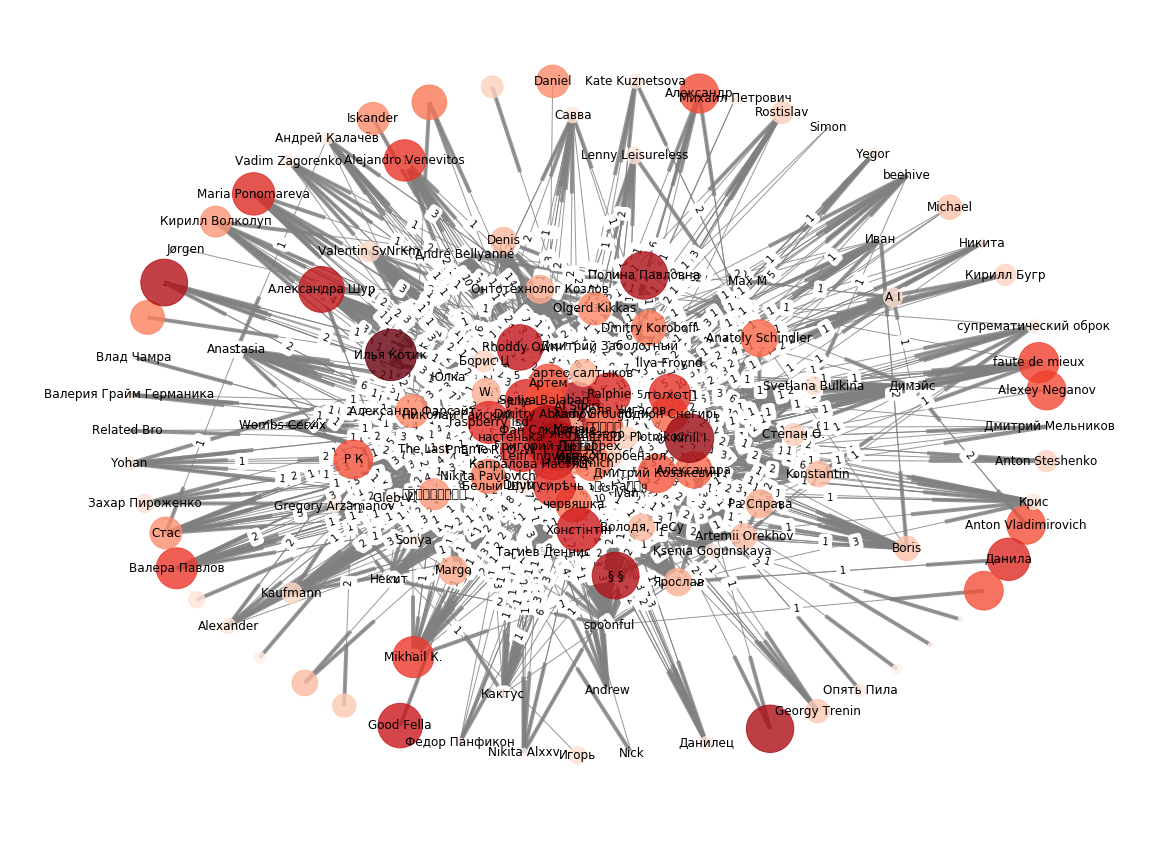

In [20]:
degree = weighted_graph.in_degree()

labels = nx.get_node_attributes(weighted_graph, 'from')
weights = nx.get_edge_attributes(weighted_graph,'weight')

plt.figure(1, figsize=(20,15))
plt.axis('off')
pos = nx.spring_layout(weighted_graph, k=3/np.sqrt(weighted_graph.order()))
nx.draw_networkx(weighted_graph,
                 pos=pos,
                 node_size = [d*30 for k, d in degree.items()],
                 node_color=degree.values(),
                 font_size=12,
                 cmap=plt.cm.Reds,
                 with_labels=True,
                 labels=labels,
                 edge_color='grey',
                 alpha=0.8)
nx.draw_networkx_edge_labels(weighted_graph,
                     pos=pos,
                     edge_labels=weights)
plt.show()

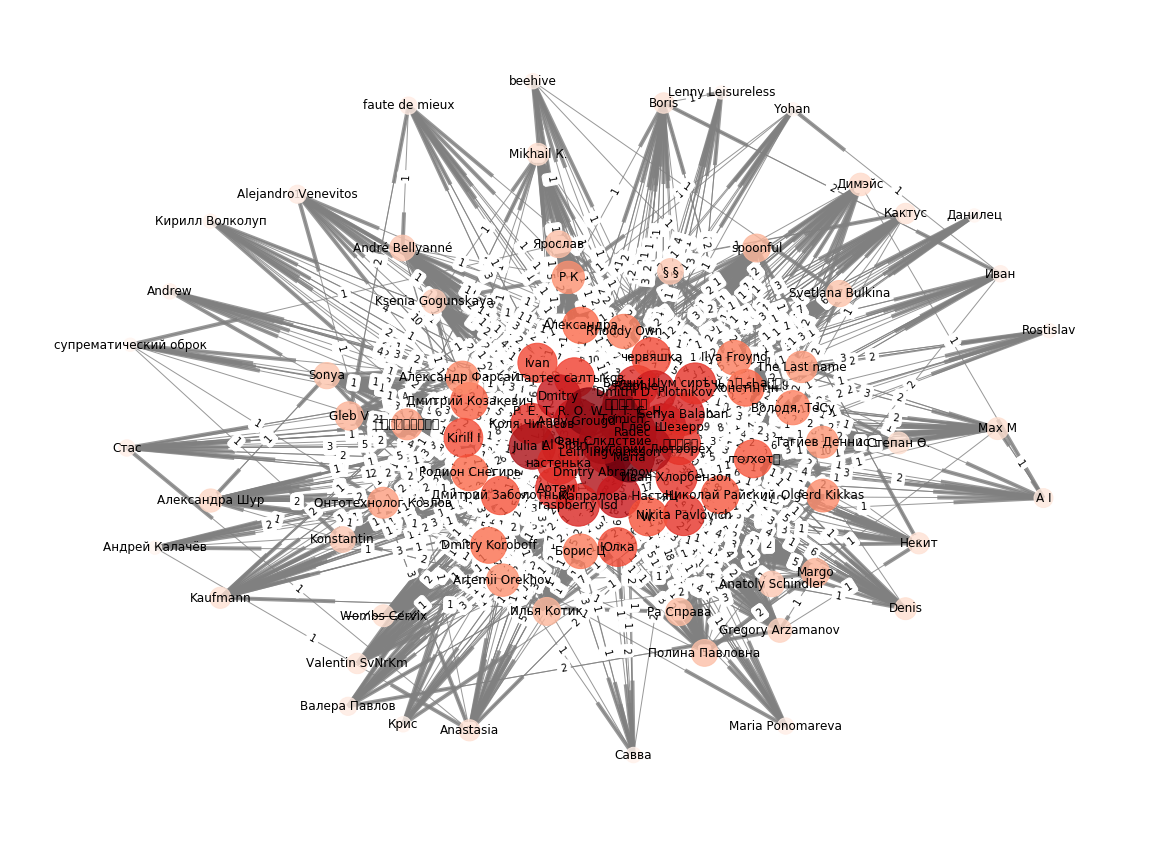

In [343]:
degree = weighted_graph.in_degree()
filtered_nodes = [k for k, v in degree.items() if v > 5]
subgraph = nx.subgraph(weighted_graph, filtered_nodes)

degree = subgraph.in_degree()

labels = nx.get_node_attributes(subgraph, 'from')
weights = nx.get_edge_attributes(subgraph,'weight')

plt.figure(1, figsize=(20,15))
plt.axis('off')
pos = nx.spring_layout(subgraph, k=3/np.sqrt(subgraph.order()))
nx.draw_networkx(subgraph,
                 pos=pos,
                 node_size = [d*30 for k, d in degree.items()],
                 node_color=degree.values(),
                 font_size=12,
                 cmap=plt.cm.Reds,
                 with_labels=True,
                 labels=labels,
                 edge_color='grey',
                 alpha=0.8)
nx.draw_networkx_edge_labels(subgraph,
                     pos=pos,
                     edge_labels=weights)
plt.show()

In [344]:
nx.write_gml(weighted_graph, chat_name+'_weighted.gml')

In [21]:
from collections import Counter
v_threshold = 8
weighted_graph = nx.DiGraph()
weighted_graph.add_nodes_from(nodes)
weighted_edges = [(x, y, {'weight': v}) for (x, y), v in Counter(edges).items() if v >= v_threshold]


weighted_graph.add_edges_from(weighted_edges)

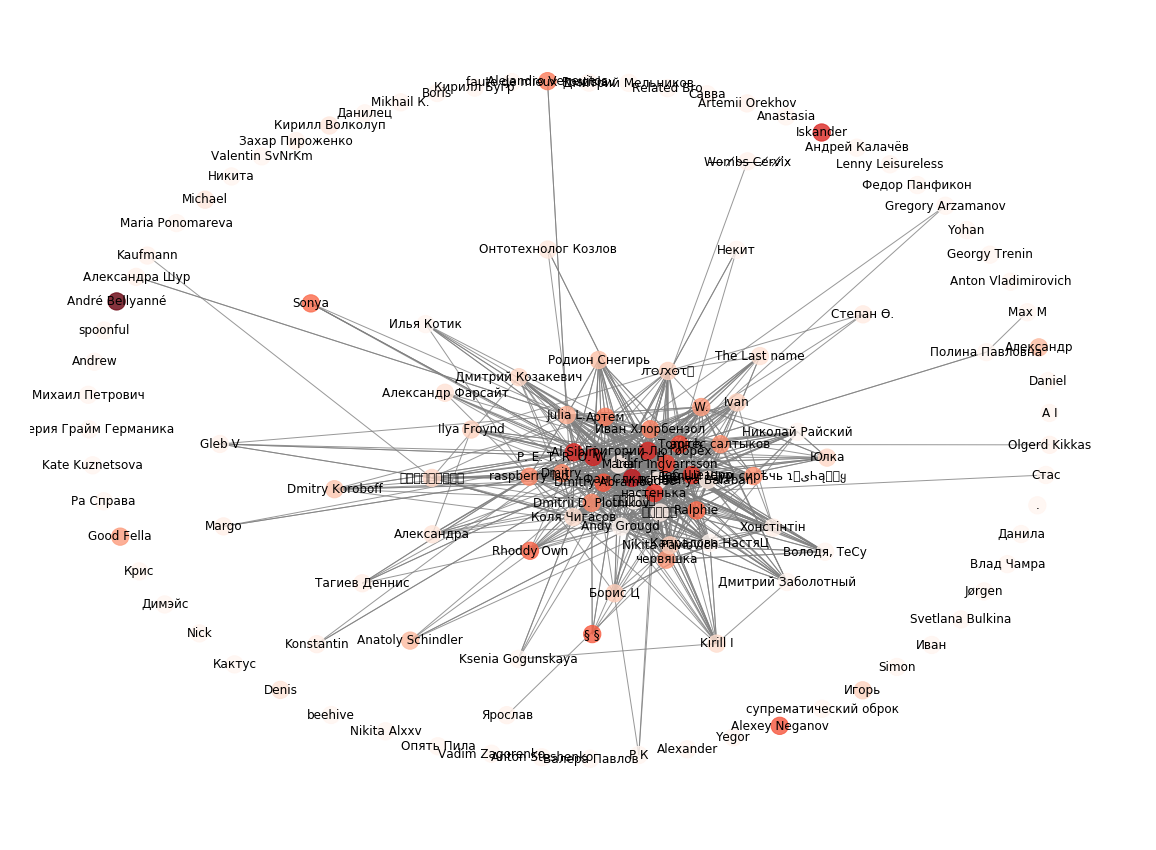

In [22]:
degree = weighted_graph.in_degree()

labels = nx.get_node_attributes(weighted_graph, 'from')
weights = nx.get_edge_attributes(weighted_graph,'weight')

plt.figure(1, figsize=(20,15))
plt.axis('off')
pos = nx.spring_layout(weighted_graph, k=3/np.sqrt(weighted_graph.order()))
nx.draw_networkx(weighted_graph,
                 pos=pos,
                 #node_size = [d*30 for k, d in degree.items()],
                 node_color=degree.values(),
                 font_size=12,
                 cmap=plt.cm.Reds,
                 with_labels=True,
                 labels=labels,
                 edge_color='grey',
                 arrows=False,
                 alpha=0.8)
#nx.draw_networkx_edge_labels(weighted_graph,
#                     pos=pos,
#                     edge_labels=weights)
plt.show()

In [36]:
from collections import Counter
v_threshold = 15
weighted_graph = nx.Graph()
weighted_graph.add_nodes_from(nodes)

edge_weight = {(x, y): v for (x, y), v in Counter(edges).items()}

mutual_weight = {(x, y): min(v, edge_weight[(y, x)]) for (x, y), v in edge_weight.items() if edge_weight.get((y, x)) and edge_weight[(y, x)] > v_threshold}

weighted_edges = [(x, y, {'weight': v}) for (x, y), v in mutual_weight.items() if v >= v_threshold]


weighted_graph.add_edges_from(weighted_edges)

weighted_graph = sorted(nx.connected_component_subgraphs(weighted_graph), key=lambda g: g.order())[-1]

/home/boris/anaconda3/envs/py2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:848: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


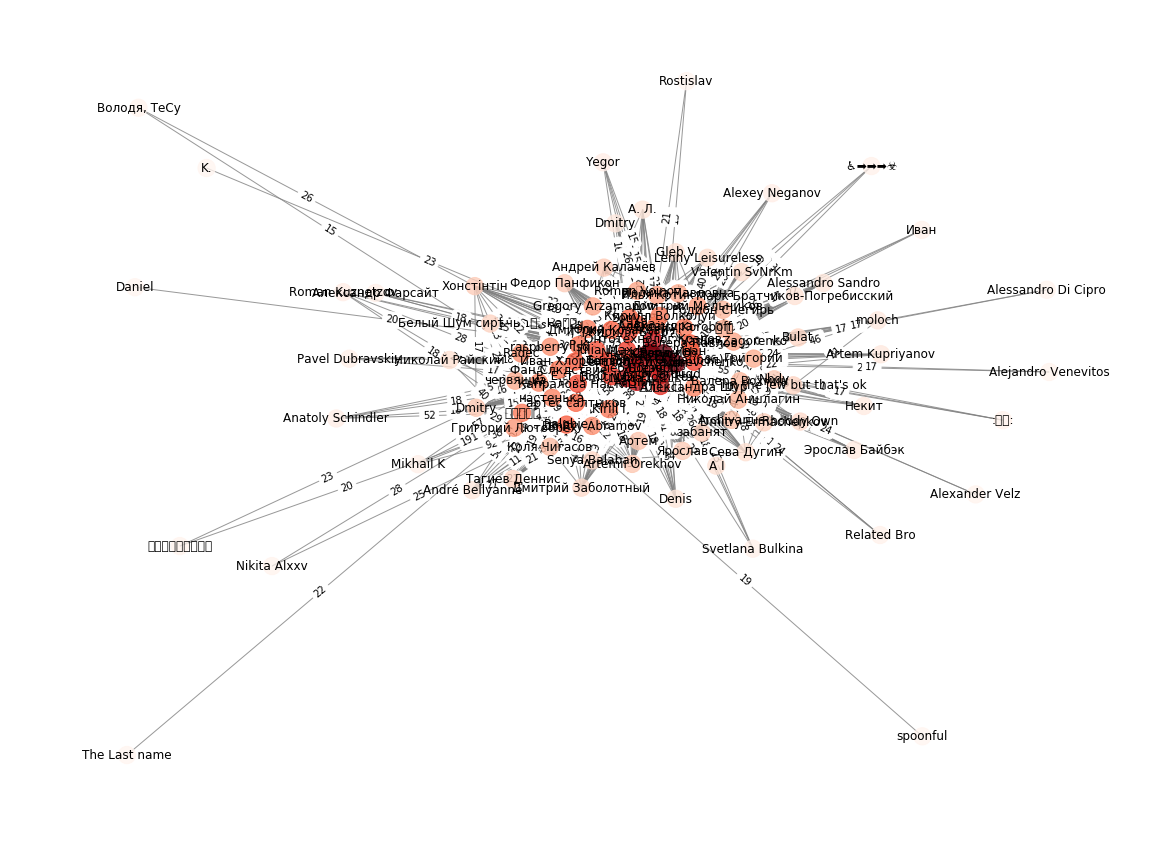

In [37]:
degree = weighted_graph.degree()

labels = nx.get_node_attributes(weighted_graph, 'from')
weights = nx.get_edge_attributes(weighted_graph,'weight')

plt.figure(1, figsize=(20,15))
plt.axis('off')
pos = nx.spring_layout(weighted_graph, k=3/np.sqrt(weighted_graph.order()))
nx.draw_networkx(weighted_graph,
                 pos=pos,
                 #node_size = [d*30 for k, d in degree.items()],
                 node_color=degree.values(),
                 font_size=12,
                 cmap=plt.cm.Reds,
                 with_labels=True,
                 labels=labels,
                 edge_color='grey',
                 arrows=False,
                 alpha=0.8)
nx.draw_networkx_edge_labels(weighted_graph,
                   pos=pos,
                   edge_labels=weights)
plt.show()

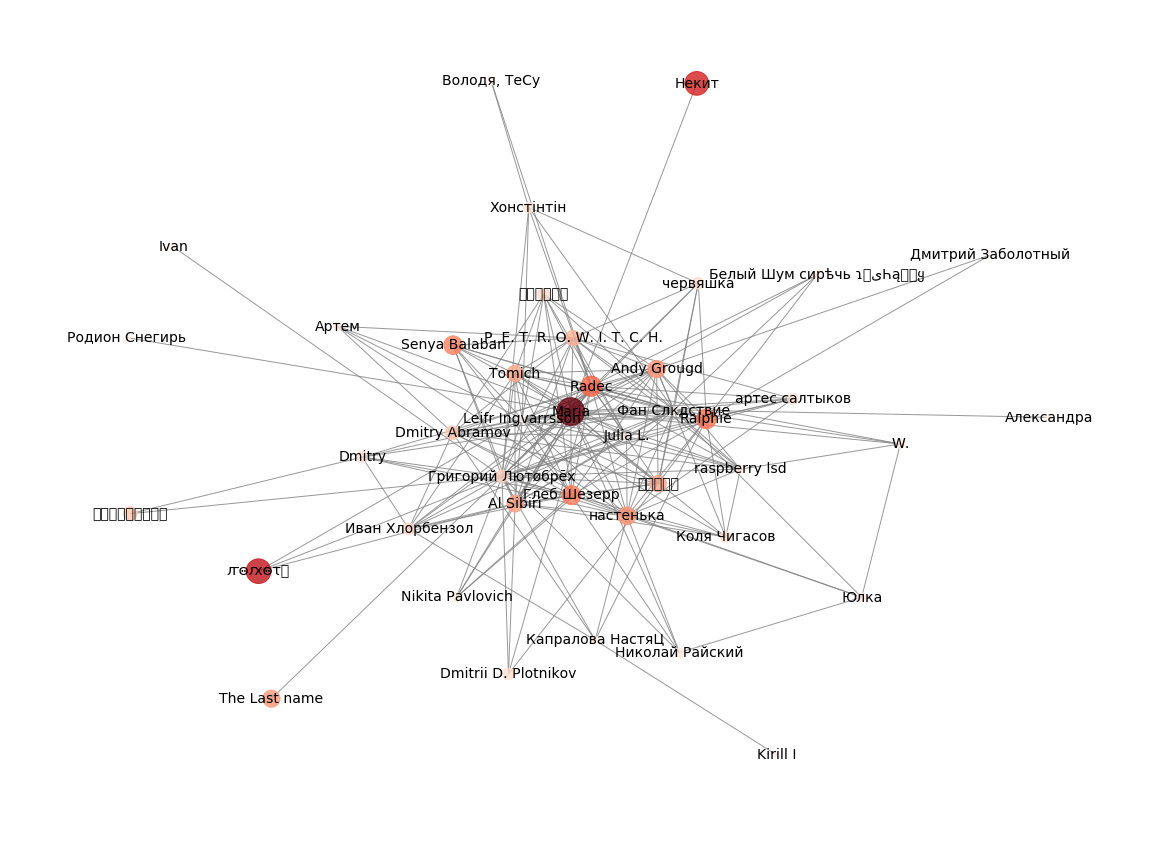

In [352]:
def draw_centralities(graph, measures, pos=None, k_mult=1.5):
    size_mult = 8000
    
    labels = nx.get_node_attributes(graph, 'from')
    
    plt.axis('off')
    pos = pos or nx.spring_layout(graph, k=k_mult/np.sqrt(graph.order()))
    nx.draw_networkx(graph,
                     pos=pos,
                     node_size = [d*size_mult for k, d in measures.items()],
                     node_color=measures.values(),
                     font_size=14,
                     cmap=plt.cm.Reds,
                     with_labels=True,
                     labels=labels,
                     edge_color='grey',
                     alpha=0.8)
    plt.show()
    
pr = nx.pagerank(weighted_graph)
plt.figure(1, figsize=(20,15))
draw_centralities(weighted_graph, pr, k_mult=3)

In [376]:
df[df.type == 'message']['from'].value_counts()[:10]
#df.reply_to_message_id.value_counts()

Maria                            6694
Фан Слкдствие                    6475
Tomich                           3967
P. E. T. R. O. W. I. T. C. H.    3424
Ярослав                          3207
Dmitry Abramov                   3098
𝙆𝙄𝙍𝙄𝙇𝙇                           3008
Al Sibiri                        2625
Глеб Шезерр                      2237
Артем                            2183
Name: from, dtype: int64

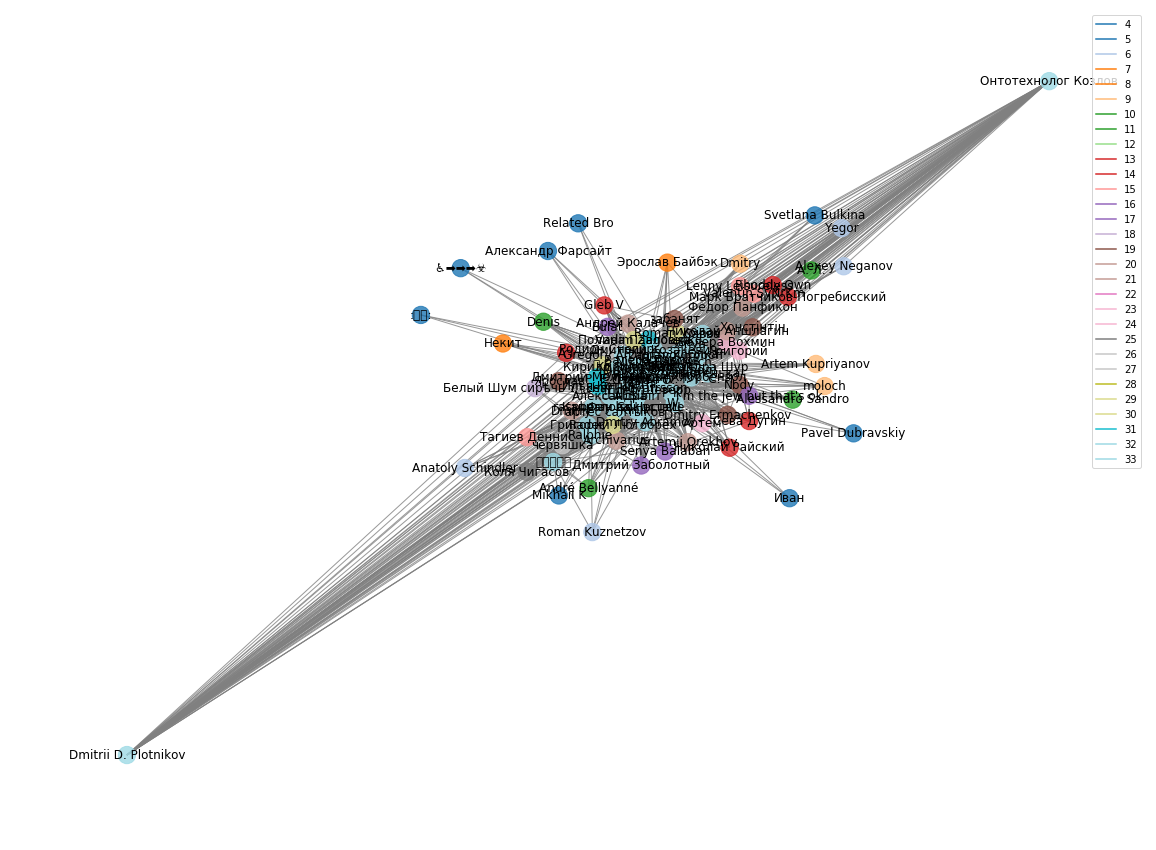

In [39]:
def draw_categorized(graph, cvals):
    labels = nx.get_node_attributes(graph, 'from')
    cmap = plt.get_cmap('tab20')
    vmin = min(cvals)
    vmax = max(cvals)
    c_norm = colors.Normalize(vmin=vmin, vmax=vmax)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    color_legend = {str(i+1): i for i in range(min(cvals), max(cvals)+1)}
    for clabel in sorted(color_legend.keys(), key=lambda x: (len(x), x)):
        plt.plot([0],[0], color=scalar_map.to_rgba(color_legend[clabel]),label=clabel)

    plt.axis('off')
    pos = nx.spring_layout(graph, k=2/np.sqrt(graph.order()))
    nx.draw_networkx(graph,
                     pos=pos,
                     node_color=cvals,
                     cmap=cmap,
                     vmin=vmin,
                     vmax=vmax,
                     font_size=12,
                     with_labels=True,
                     labels=labels,
                     edge_color='grey',
                     alpha=0.8)

    plt.legend()
    plt.show()
    
def draw_kcore(graph): 
    plt.figure(figsize=(20,15))

    core_num = nx.core_number(graph)
    cvals = core_num.values()

    draw_categorized(graph, cvals)
    
weighted_graph.remove_edges_from(weighted_graph.selfloop_edges())
draw_kcore(nx.k_core(weighted_graph, 3))

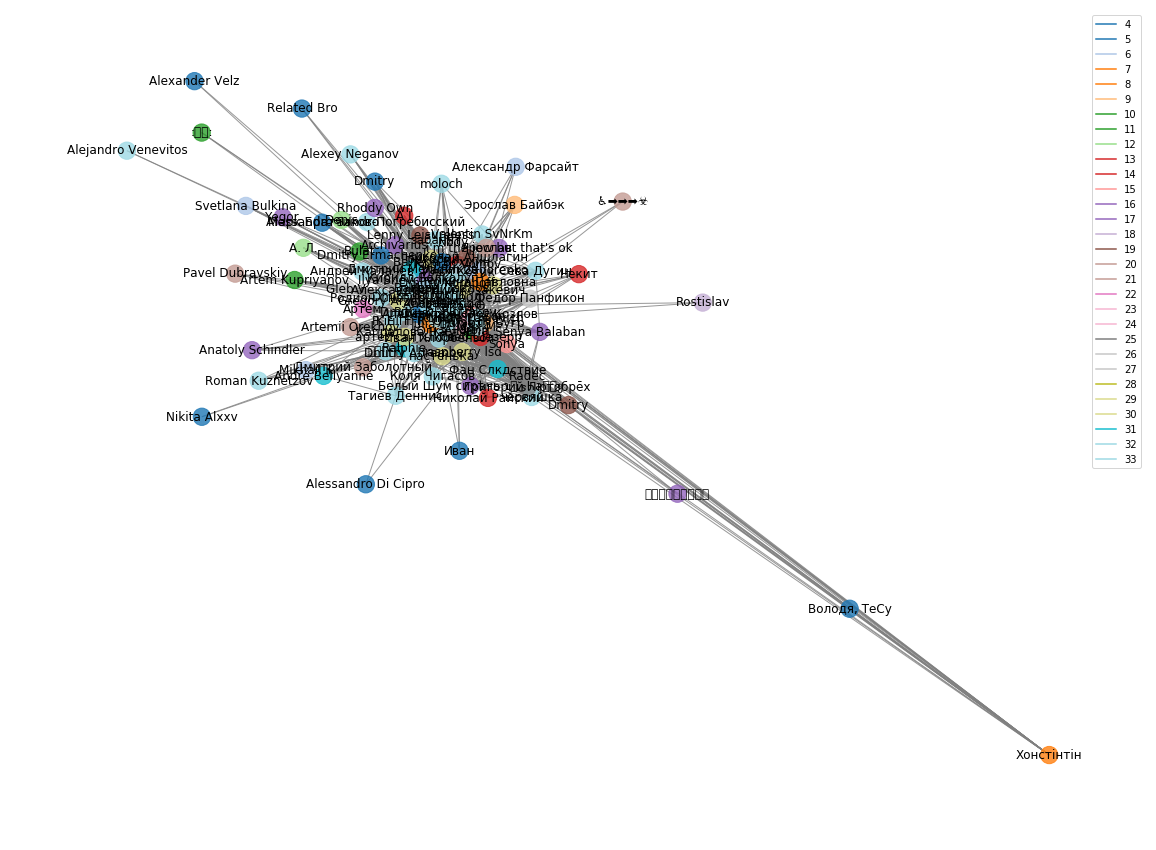

In [40]:
def draw_cliques(graph): 
    plt.figure(figsize=(20,15))

    node_clique_number = nx.node_clique_number(graph)
    cvals = node_clique_number.values()

    draw_categorized(graph, cvals)
    
draw_cliques(nx.k_core(weighted_graph, 2))

In [52]:
df.head()

chat_id         chat_name                 date            from  \
0  8827804907  FR_Помощничество  2019-03-25T16:57:25         Борис Ц   
1  8827804907  FR_Помощничество  2019-03-25T16:58:04         Борис Ц   
2  8827804907  FR_Помощничество  2019-03-25T16:58:04         Борис Ц   
3  8827804907  FR_Помощничество  2019-03-25T16:58:36         Борис Ц   
4  8827804907  FR_Помощничество  2019-03-25T16:59:08  Федор Панфикон   

     from_id      id mention_username reply_to_message_id     type  
0  389451119  364033              NaN                 NaN  message  
1  389451119  364034              NaN                 NaN  message  
2  389451119  364035              NaN                 NaN  message  
3  389451119  364036              NaN                 NaN  message  
4  114379293  364043              NaN                 NaN  message

In [57]:
df[(df.from_id == 389451119)].chat_id.value_counts().shape[0]

36

In [68]:
chats_per_user = df.groupby('from_id')['chat_id'].nunique()
chats_per_user.head()

from_id
171485     1
232715     2
454074     7
509112    16
529117     6
Name: chat_id, dtype: int64

In [289]:
df.groupby('from')['from_id'].first()['Dmitry Ermachenkov']

125248723

In [287]:
chats_user_is_in = df.groupby('from')['chat_name'].apply(set)
chats_user_is_in['Dmitry Ermachenkov']

{u'FR_\u0423\u0436\u0435\u043d\u0435\u0449\u0435\u0433\u043b\u044f\u0442\u043d\u0438\u043a'}

In [77]:
user_chats = df.groupby('from_id')['chat_id'].apply(set)
user_chats.head()

from_id
171485                                         {9686550236}
232715                             {9924931295, 9978478271}
454074    {10068801736, 9983522484, 9788112757, 96826370...
509112    {10006604611, 9951131621, 9698322695, 98555494...
529117    {9693784064, 8755906545, 9983522484, 992493129...
Name: chat_id, dtype: object

In [111]:
user_chats[171485]

{9686550236}

In [122]:
pairs = list(combinations(user_chats.index,2))

rows = []

for user1, user2 in pairs:
    val = len(user_chats[user1].intersection(user_chats[user2]))
    
    rows.append([user1, user2, val])

common_chats = pd.DataFrame(rows, columns=['user_1', 'user_2', 'common_chats'])
common_chats.head()

user_1   user_2  common_chats
0  171485   232715             0
1  171485   454074             1
2  171485   509112             1
3  171485   529117             1
4  171485  1293538             1

In [156]:
user_matrix = common_chats.pivot(index='user_1', columns='user_2', values='common_chats')
user_matrix.head()

user_2  232715     454074     509112     529117     1293538    1395099    \
user_1                                                                     
171485        0.0        1.0        1.0        1.0        1.0        0.0   
232715        NaN        1.0        2.0        1.0        2.0        1.0   
454074        NaN        NaN        5.0        2.0        3.0        0.0   
509112        NaN        NaN        NaN        3.0        8.0        3.0   
529117        NaN        NaN        NaN        NaN        3.0        2.0   

user_2  1469626    1524830    1766831    1895523      ...      606919522  \
user_1                                                ...                  
171485        0.0        0.0        1.0        0.0    ...            0.0   
232715        0.0        0.0        0.0        2.0    ...            0.0   
454074        0.0        0.0        2.0        2.0    ...            2.0   
509112        1.0        0.0        5.0        5.0    ...            2.0   
529117        0.0        1.0        3.0        3.0    ...            0.0   

user_2  628683813  638188689  692427821  706157668  715284977  761779121  \
user_1                                                                     
171485        0.0        0.0        0.0        0.0        0.0        0.0   
232715        0.0        1.0        0.0        0.0        0.0        0.0   
454074        0.0        1.0        0.0        0.0        2.0        1.0   
509112        1.0        1.0        1.0        1.0        2.0        1.0   
529117        0.0        0.0        0.0        0.0        0.0        0.0   

user_2  770200732  780249296  795170290  
user_1                                   
171485        1.0        0.0        0.0  
232715        0.0        1.0        1.0  
454074        1.0        1.0        0.0  
509112        1.0        1.0        1.0  
529117        1.0        0.0        1.0  

[5 rows x 307 columns]

In [290]:
user_matrix[125248723]

user_1
171485       0.0
232715       0.0
454074       0.0
509112       1.0
529117       0.0
1293538      1.0
1395099      0.0
1469626      1.0
1524830      0.0
1766831      0.0
1895523      0.0
1942205      1.0
2338914      0.0
2601428      0.0
2751211      0.0
3186611      0.0
3554141      1.0
4235187      0.0
6031267      0.0
7235898      0.0
7957793      0.0
10912455     1.0
11385245     0.0
16835192     1.0
22295026     1.0
22423968     0.0
23028404     1.0
23873658     0.0
27427759     0.0
27547278     0.0
            ... 
435500921    NaN
436396564    NaN
441926055    NaN
443340527    NaN
446747504    NaN
454932596    NaN
461963657    NaN
472126573    NaN
472506237    NaN
475896065    NaN
480652684    NaN
490615155    NaN
494029518    NaN
498025642    NaN
499130576    NaN
504196959    NaN
520248084    NaN
530408372    NaN
545563108    NaN
586220294    NaN
606840591    NaN
606919522    NaN
628683813    NaN
638188689    NaN
692427821    NaN
706157668    NaN
715284977    NaN
7617791

In [157]:
rotated = user_matrix.T
rotated.index = user_matrix.index
rotated.columns = user_matrix.columns
rotated.head()

user_2  232715     454074     509112     529117     1293538    1395099    \
user_1                                                                     
171485        0.0        NaN        NaN        NaN        NaN        NaN   
232715        1.0        1.0        NaN        NaN        NaN        NaN   
454074        1.0        2.0        5.0        NaN        NaN        NaN   
509112        1.0        1.0        2.0        3.0        NaN        NaN   
529117        1.0        2.0        3.0        8.0        3.0        NaN   

user_2  1469626    1524830    1766831    1895523      ...      606919522  \
user_1                                                ...                  
171485        NaN        NaN        NaN        NaN    ...            NaN   
232715        NaN        NaN        NaN        NaN    ...            NaN   
454074        NaN        NaN        NaN        NaN    ...            NaN   
509112        NaN        NaN        NaN        NaN    ...            NaN   
529117        NaN        NaN        NaN        NaN    ...            NaN   

user_2  628683813  638188689  692427821  706157668  715284977  761779121  \
user_1                                                                     
171485        NaN        NaN        NaN        NaN        NaN        NaN   
232715        NaN        NaN        NaN        NaN        NaN        NaN   
454074        NaN        NaN        NaN        NaN        NaN        NaN   
509112        NaN        NaN        NaN        NaN        NaN        NaN   
529117        NaN        NaN        NaN        NaN        NaN        NaN   

user_2  770200732  780249296  795170290  
user_1                                   
171485        NaN        NaN        NaN  
232715        NaN        NaN        NaN  
454074        NaN        NaN        NaN  
509112        NaN        NaN        NaN  
529117        NaN        NaN        NaN  

[5 rows x 307 columns]

In [158]:
user_matrix_sym = user_matrix.fillna(0) + rotated.fillna(0)
user_matrix_sym.head()

user_2  232715     454074     509112     529117     1293538    1395099    \
user_1                                                                     
171485        0.0        1.0        1.0        1.0        1.0        0.0   
232715        1.0        2.0        2.0        1.0        2.0        1.0   
454074        1.0        2.0       10.0        2.0        3.0        0.0   
509112        1.0        1.0        2.0        6.0        8.0        3.0   
529117        1.0        2.0        3.0        8.0        6.0        2.0   

user_2  1469626    1524830    1766831    1895523      ...      606919522  \
user_1                                                ...                  
171485        0.0        0.0        1.0        0.0    ...            0.0   
232715        0.0        0.0        0.0        2.0    ...            0.0   
454074        0.0        0.0        2.0        2.0    ...            2.0   
509112        1.0        0.0        5.0        5.0    ...            2.0   
529117        0.0        1.0        3.0        3.0    ...            0.0   

user_2  628683813  638188689  692427821  706157668  715284977  761779121  \
user_1                                                                     
171485        0.0        0.0        0.0        0.0        0.0        0.0   
232715        0.0        1.0        0.0        0.0        0.0        0.0   
454074        0.0        1.0        0.0        0.0        2.0        1.0   
509112        1.0        1.0        1.0        1.0        2.0        1.0   
529117        0.0        0.0        0.0        0.0        0.0        0.0   

user_2  770200732  780249296  795170290  
user_1                                   
171485        1.0        0.0        0.0  
232715        0.0        1.0        1.0  
454074        1.0        1.0        0.0  
509112        1.0        1.0        1.0  
529117        1.0        0.0        1.0  

[5 rows x 307 columns]

In [159]:
user_matrix_sym.to_csv('fr_common_chats.csv')

In [268]:
treshold = 5
treshold_matrix = pd.DataFrame(user_matrix_sym)
treshold_matrix[treshold_matrix <= treshold] = 0

In [269]:
name_map = df.groupby('from_id')['from'].first()

In [270]:
user_ids = np.array(user_matrix_sym.index)
names = name_map[user_ids]

In [271]:
graph = nx.from_numpy_matrix(treshold_matrix.values)
relabel_map = dict(zip(graph.nodes(), list(user_matrix_sym.index)))
graph = nx.relabel_nodes(graph, relabel_map)
graph = sorted(nx.connected_component_subgraphs(graph), key=len)[-1]
graph.remove_edges_from(graph.selfloop_edges())

node_names_map = dict(zip(graph.nodes(), list(names.values)))
nx.set_node_attributes(graph, 'from', node_names_map)

In [272]:
graph.nodes(data=True)[2]

(117189129, {'from': u'W.'})

In [273]:
graph.size()

1593

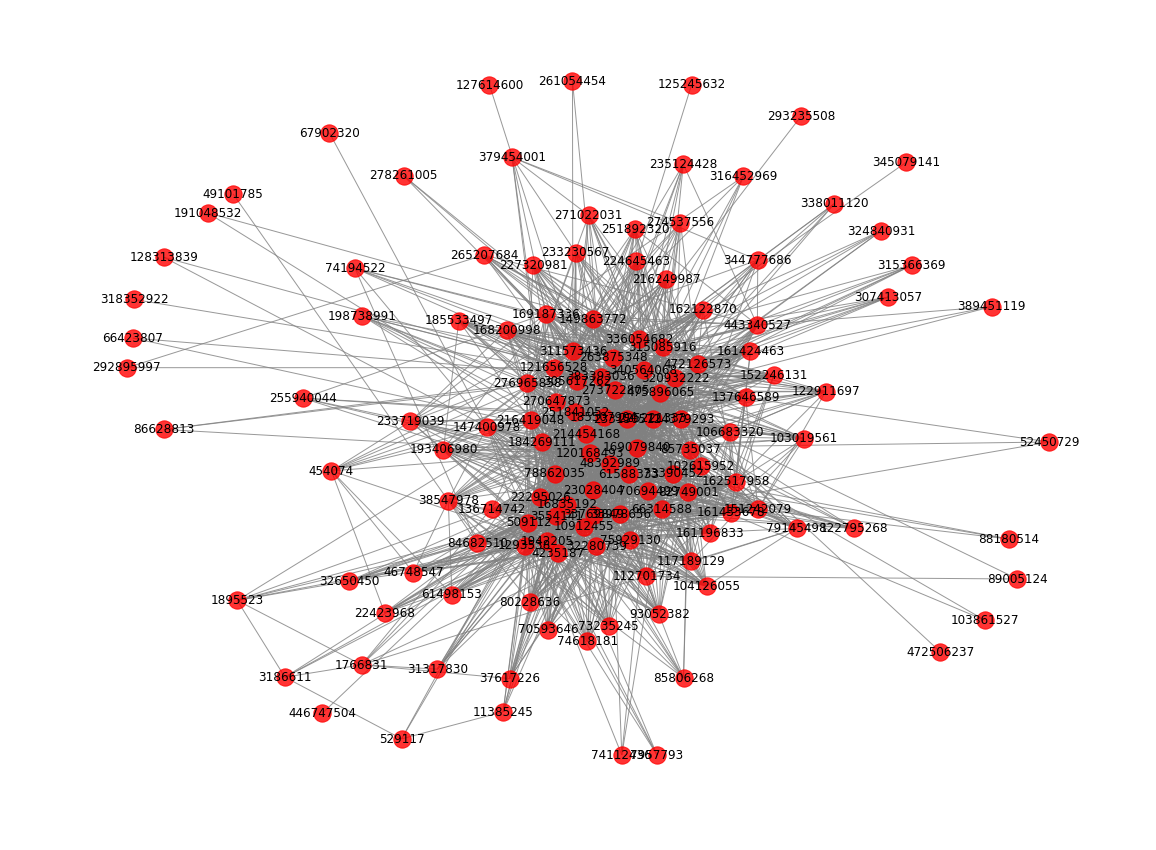

In [274]:
weights = nx.get_edge_attributes(graph, 'weight')

plt.figure(figsize=(20,15))
plt.axis('off')
pos = nx.spring_layout(graph, k=3/np.sqrt(graph.order()))
nx.draw_networkx(graph,
                 pos=pos,
                 font_size=12,
                 cmap=plt.cm.Reds,
                 with_labels=True,
                 #labels=labels,
                 edge_color='grey',
                 alpha=0.8)
# nx.draw_networkx_edge_labels(graph,
#                      pos=pos,
#                      edge_labels=weights)
plt.show()

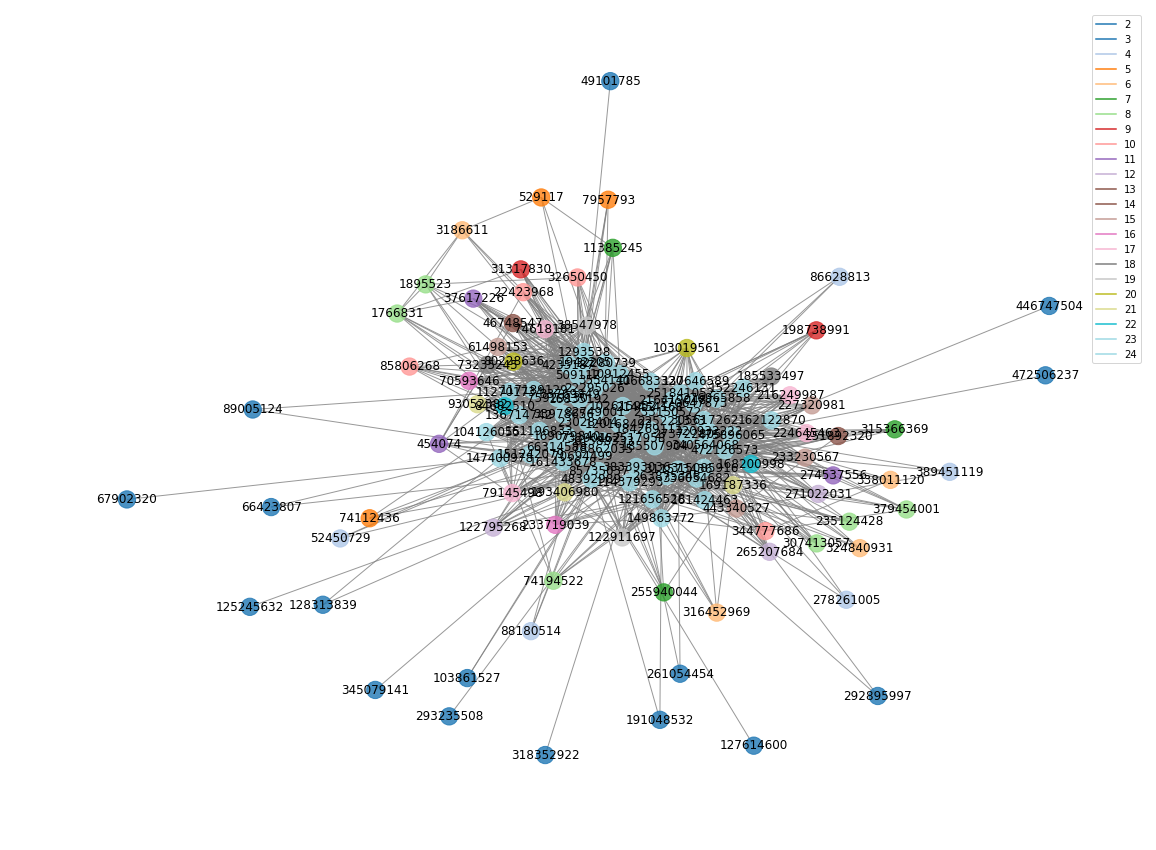

In [275]:
def draw_categorized(graph, cvals):
    cmap = plt.get_cmap('tab20')
    vmin = min(cvals)
    vmax = max(cvals)
    c_norm = colors.Normalize(vmin=vmin, vmax=vmax)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    color_legend = {str(i+1): i for i in range(min(cvals), max(cvals)+1)}
    for clabel in sorted(color_legend.keys(), key=lambda x: (len(x), x)):
        plt.plot([0],[0], color=scalar_map.to_rgba(color_legend[clabel]),label=clabel)

    plt.axis('off')
    pos = nx.spring_layout(graph, k=2/np.sqrt(graph.order()))
    nx.draw_networkx(graph,
                     pos=pos,
                     node_color=cvals,
                     cmap=cmap,
                     vmin=vmin,
                     vmax=vmax,
                     font_size=12,
                     with_labels=True,
                     edge_color='grey',
                     alpha=0.8)

    plt.legend()
    plt.show()
    
def draw_kcore(graph): 
    plt.figure(figsize=(20,15))

    core_num = nx.core_number(graph)
    cvals = core_num.values()

    draw_categorized(graph, cvals)
draw_kcore(graph)

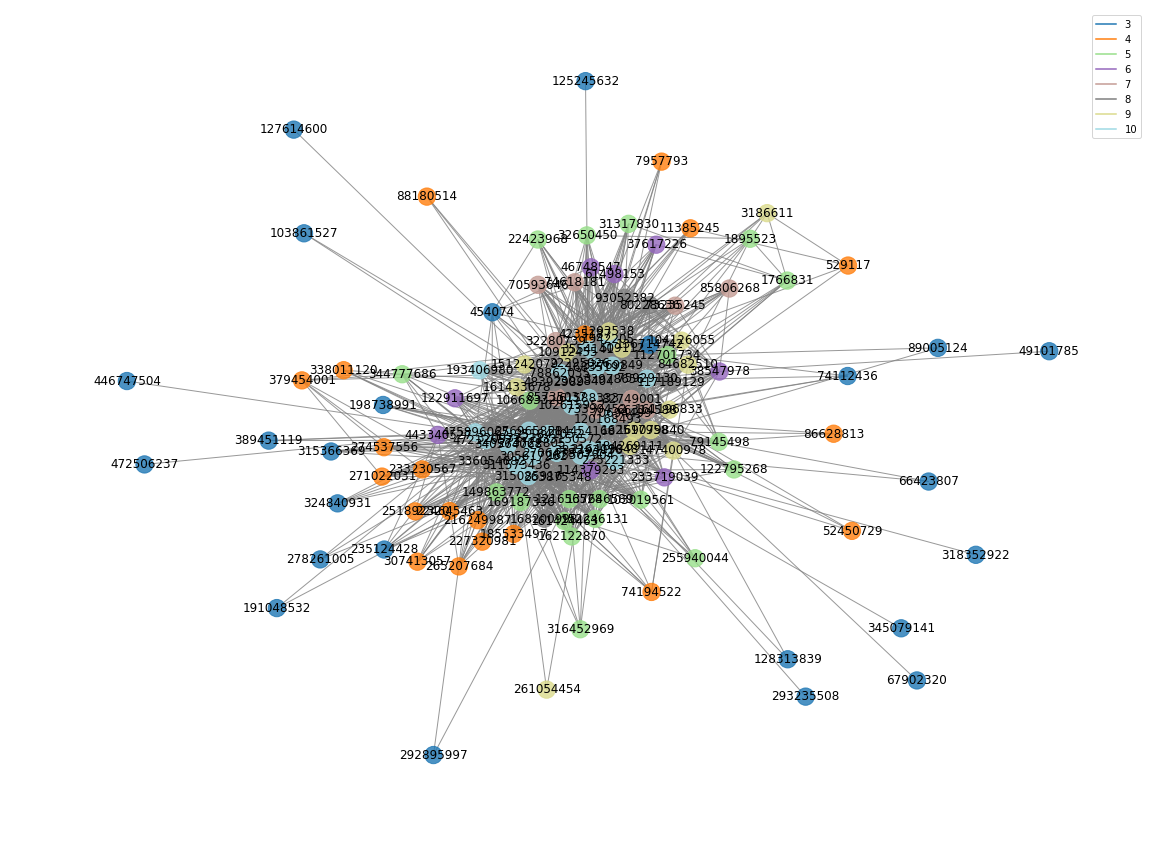

In [276]:
def draw_cliques(graph): 
    plt.figure(figsize=(20,15))

    node_clique_number = nx.node_clique_number(graph)
    cvals = node_clique_number.values()

    draw_categorized(graph, cvals)
    
draw_cliques(graph)

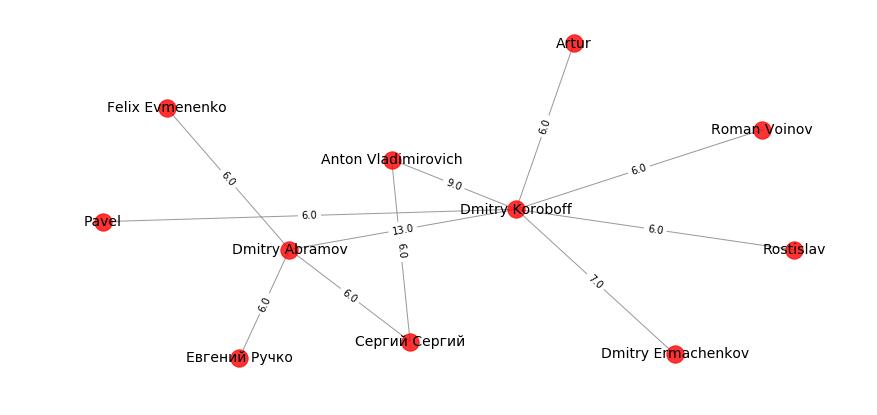

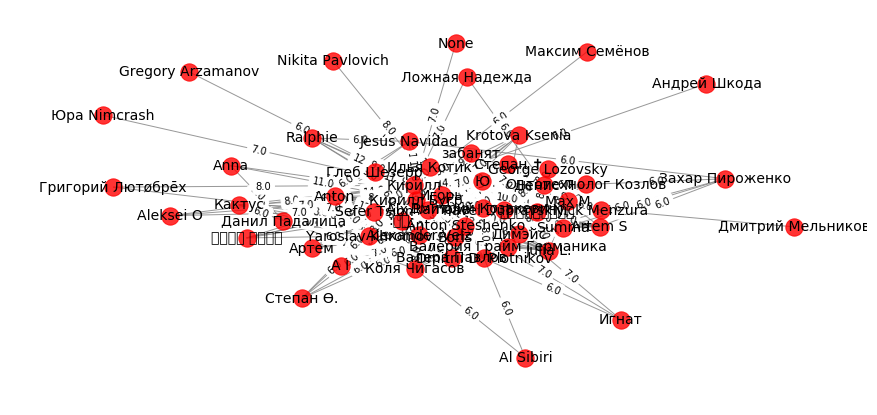

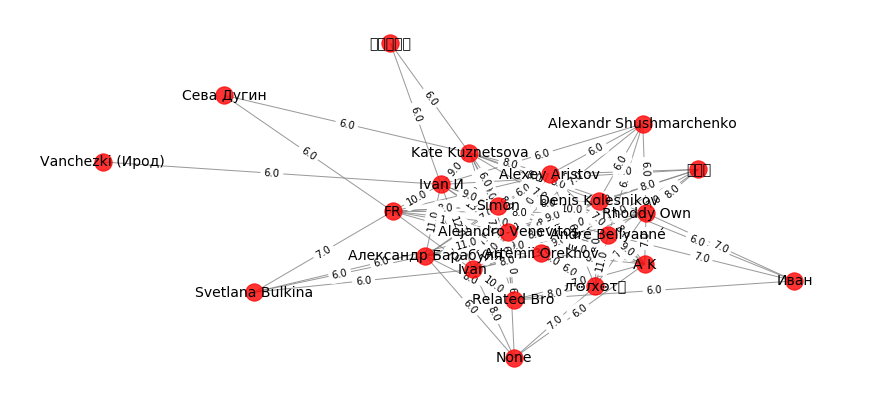

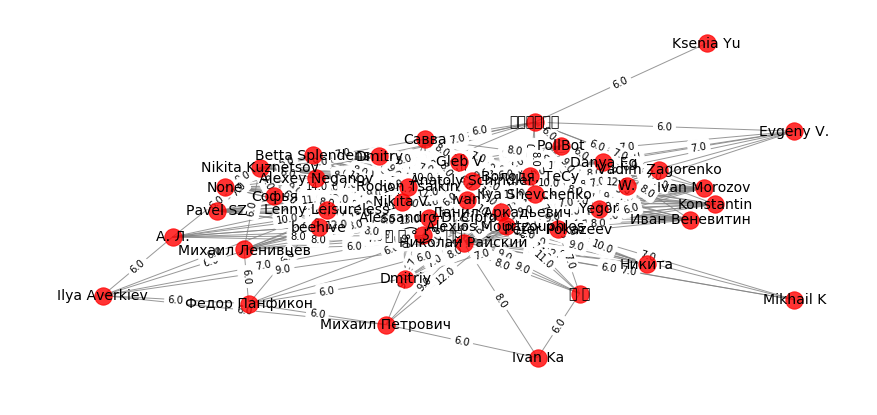

In [280]:
partition = cylouvain.best_partition(graph)

unique_coms = list(set(partition.values()))
for com in unique_coms:
    c_nodes = [k for k in partition if partition[k] == com]
    c_subgraph = nx.subgraph(graph, c_nodes)
    
    labels = nx.get_node_attributes(c_subgraph, 'from')
    weights = nx.get_edge_attributes(c_subgraph, 'weight')
    plt.figure(figsize=(15,7))
    plt.axis('off')
    pos = nx.spring_layout(c_subgraph, k=2/np.sqrt(c_subgraph.order()))
    nx.draw_networkx(c_subgraph,
                     pos=pos,
                     font_size=14,
                     cmap=plt.cm.Reds,
                     with_labels=True,
                     labels=labels,
                     edge_color='grey',
                     alpha=0.8)
    nx.draw_networkx_edge_labels(graph,
                     pos=pos,
                     edge_labels=weights)
    plt.show()